In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')
#vsdf

In [2]:
# creating database connection
conn = sqlite3.connect('inventory.db')

#fetching vendor summary data
df = pd.read_sql_query("select * from vendor_sales_sumary", conn)
df.head()

,VendorNumber,VendorName,Description,Brand,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalDollars,TotalSalesQuantity,TotalSaleDollars,TotalSalePrice,TotalExciseTax,freightcost,GrossProfit,ProfitMargin,StockTurnover,SalesPurchaseRatio
0,1128,BROWN-FORMAN CORP,Jack Daniels No 7 Black,1233,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,Tito's Handmade Vodka,3405,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,Absolut 80 Proof,8068,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,Capt Morgan Spiced Rum,4261,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,Ketel One Vodka,3545,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


Previously, we examined the various tables in the database to identify key variables, understand their relationships, and determine which ones should be included in the final analysis.

In this phase of EDA, we will analyze the resultant table to gain insights into the distribution of each column. This will help us understand data patterns, identify anomalies, and ensure data quality before proceeding with further analysis.


In [3]:
#summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
TotalSaleDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalePrice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


In [4]:
pd.set_option('display.float_format', lambda x:'%.4f' %x)

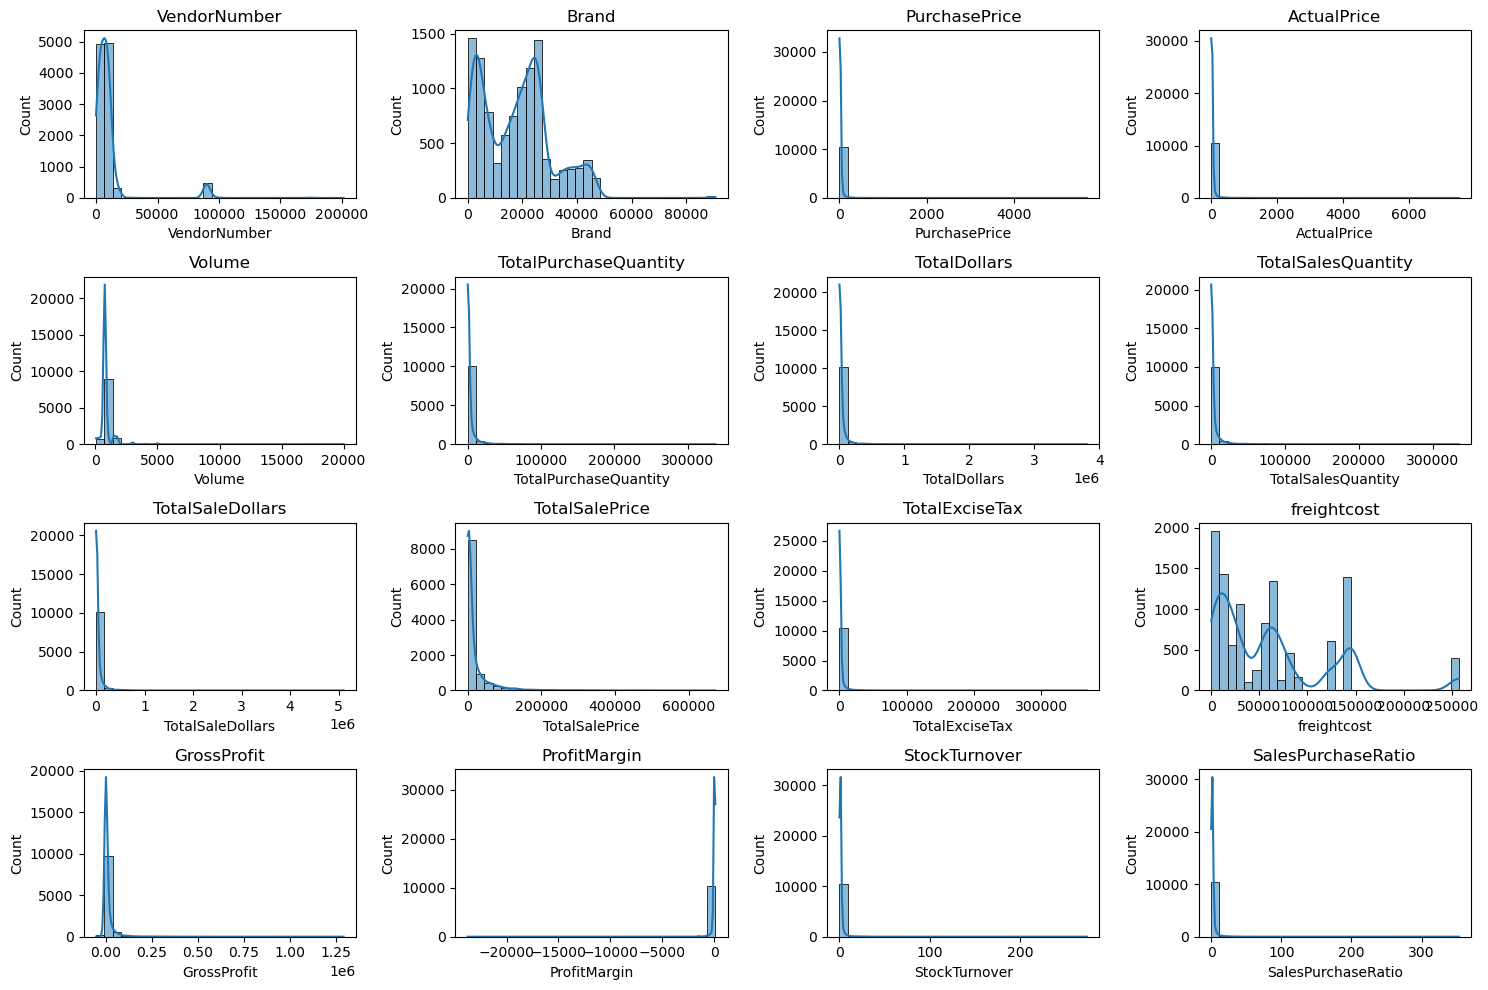

In [5]:
numerical_cols = df.select_dtypes(include = ['number']).columns

plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,4, i+1)
    sns.histplot(df[col], kde = True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

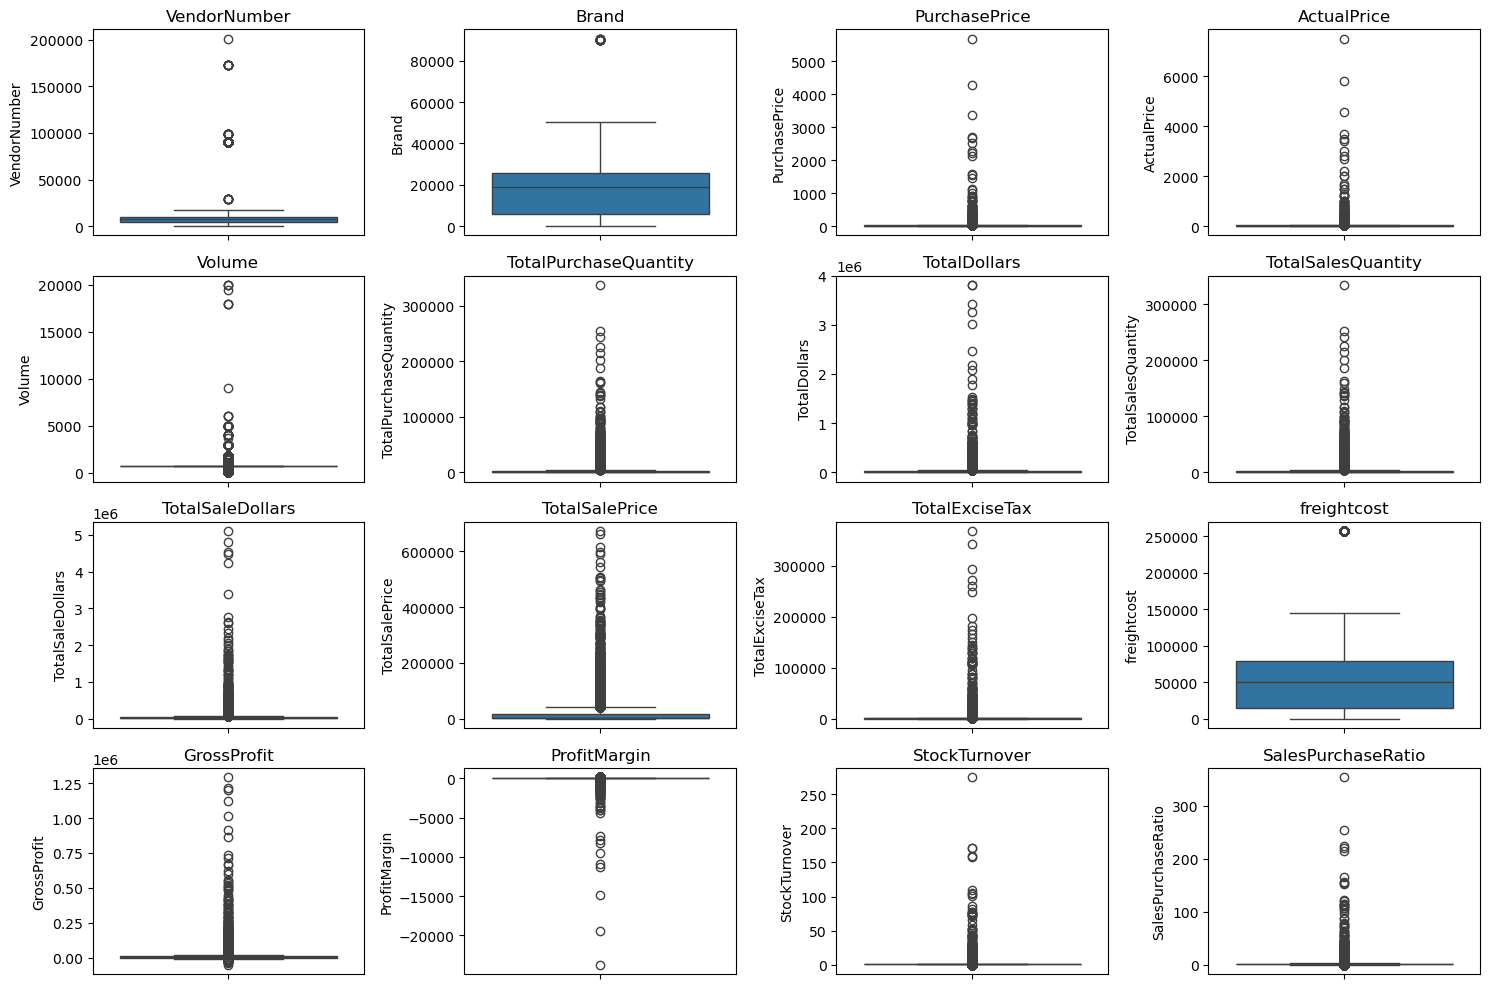

In [6]:
plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,4, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Summary Statistics Insights:

Negative & Zero Values:

A Gross Profit: Minimum value is -52,002.78, indicating losses. Some products or transactions may be selling at a loss due to high costs or selling at discounts lower than the purchase price..

Profit Margin: Has a minimum of -o∞, which suggests cases where revenue is zero or even lower than costs.

Total Sales Quantity & Sales Dollars: Minimum values are 0, meaning some products were purchased but never sold. These could be slow-moving or obsolete stock.

Outliers Indicated by High Standard Deviations:

Purchase & Actual Prices: The max values (5,681.81 & 7,499.99) are significantly higher than the mean (24.39 & 35.64), indicating potential premium

products.

Freight Cost: Huge variation, from 0.09 to 257,032.07, suggests logistics inefficiencies or bulk shipments.

Stock Turnover: Ranges from 0 to 274.5, implying some products sell extremely fast while others remain in stock indefinitely. Value more than 1 indicates that Sold quantity for that product is higher than purchased quantity due to either sales are being fulfilled from older stock.



In [7]:
df.columns

Index(['VendorNumber', 'VendorName', 'Description', 'Brand', 'PurchasePrice',
       'ActualPrice', 'Volume', 'TotalPurchaseQuantity', 'TotalDollars',
       'TotalSalesQuantity', 'TotalSaleDollars', 'TotalSalePrice',
       'TotalExciseTax', 'freightcost', 'GrossProfit', 'ProfitMargin',
       'StockTurnover', 'SalesPurchaseRatio'],
      dtype='object')

In [8]:
df = pd.read_sql_query("""select * from vendor_sales_sumary
where GrossProfit>0
and ProfitMargin>0
and TotalSalesQuantity>0""",conn)

In [9]:
df

,VendorNumber,VendorName,Description,Brand,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalDollars,TotalSalesQuantity,TotalSaleDollars,TotalSalePrice,TotalExciseTax,freightcost,GrossProfit,ProfitMargin,StockTurnover,SalesPurchaseRatio
0,1128,BROWN-FORMAN CORP,Jack Daniels No 7 Black,1233,26.2700,36.9900,1750.0000,145080,3811251.6000,142049.0000,5101919.5100,672819.3100,260999.2000,68601.6800,1290667.9100,25.2977,0.9791,1.3386
1,4425,MARTIGNETTI COMPANIES,Tito's Handmade Vodka,3405,23.1900,28.9900,1750.0000,164038,3804041.2200,160247.0000,4819073.4900,561512.3700,294438.6600,144929.2400,1015032.2700,21.0628,0.9769,1.2668
2,17035,PERNOD RICARD USA,Absolut 80 Proof,8068,18.2400,24.9900,1750.0000,187407,3418303.6800,187140.0000,4538120.6000,461140.1500,343854.0700,123780.2200,1119816.9200,24.6758,0.9986,1.3276
3,3960,DIAGEO NORTH AMERICA INC,Capt Morgan Spiced Rum,4261,16.1700,22.9900,1750.0000,201682,3261197.9400,200412.0000,4475972.8800,420050.0100,368242.8000,257032.0700,1214774.9400,27.1399,0.9937,1.3725
4,3960,DIAGEO NORTH AMERICA INC,Ketel One Vodka,3545,21.8900,29.9900,1750.0000,138109,3023206.0100,135838.0000,4223107.6200,545778.2800,249587.8300,257032.0700,1199901.6100,28.4128,0.9836,1.3969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,Concannon Glen Ellen Wh Zin,8527,1.3200,4.9900,750.0000,2,2.6400,5.0000,15.9500,10.9600,0.5500,27100.4100,13.3100,83.4483,2.5000,6.0417
8560,8004,SAZERAC CO INC,Dr McGillicuddy's Apple Pie,5683,0.3900,0.4900,50.0000,6,2.3400,134.0000,65.6600,1.4700,7.0400,50293.6200,63.3200,96.4362,22.3333,28.0598
8561,3924,HEAVEN HILL DISTILLERIES,Deep Eddy Vodka,9123,0.7400,0.9900,50.0000,2,1.4800,2.0000,1.9800,0.9900,0.1000,14069.8700,0.5000,25.2525,1.0000,1.3378
8562,3960,DIAGEO NORTH AMERICA INC,The Club Strawbry Margarita,6127,1.4700,1.9900,200.0000,1,1.4700,72.0000,143.2800,77.6100,15.1200,257032.0700,141.8100,98.9740,72.0000,97.4694


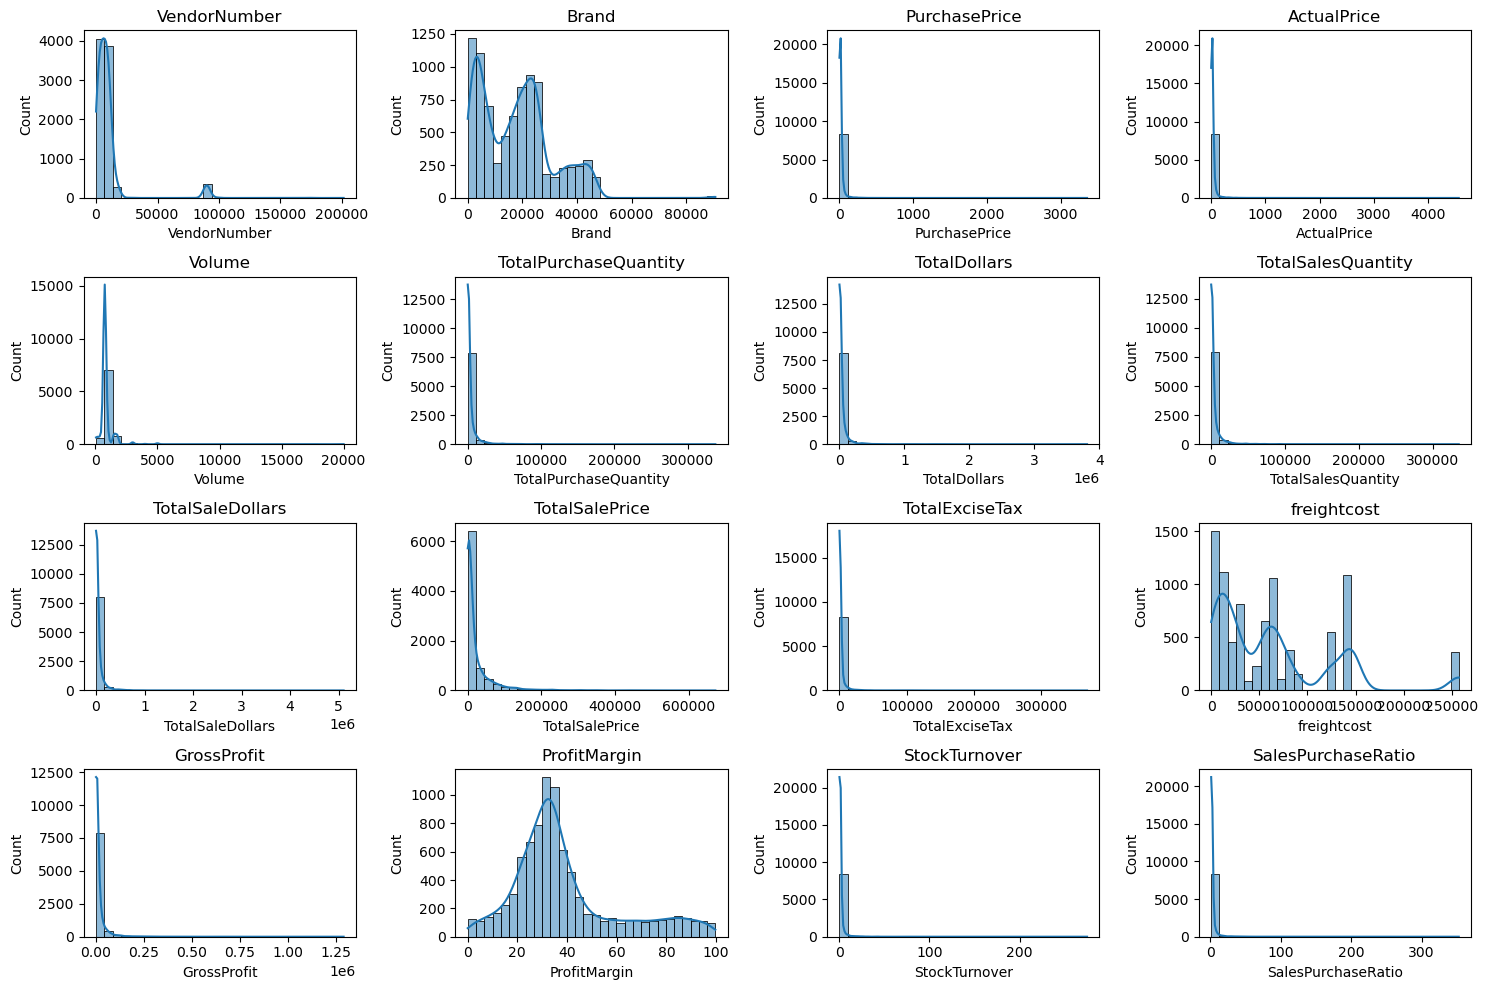

In [10]:
plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,4, i+1)
    sns.histplot(df[col], kde = True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

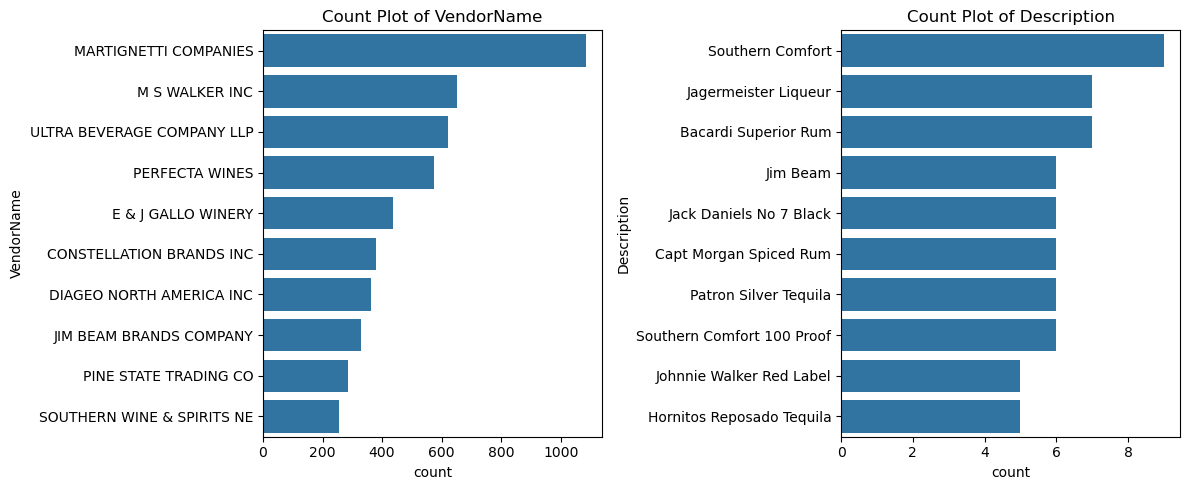

In [11]:
categorical_cols = ['VendorName', 'Description']

plt.figure(figsize=(12,5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1,2, i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10])
    plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()

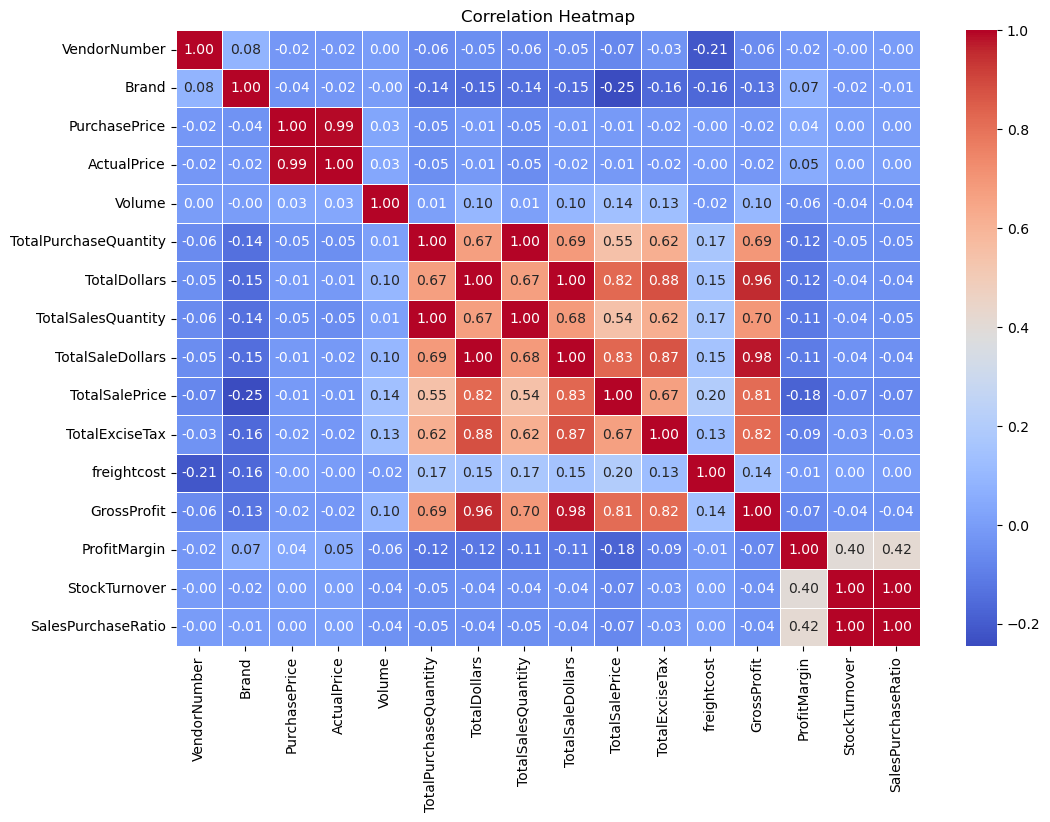

In [12]:
plt.figure(figsize= (12,8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot = True, fmt = ".2f", cmap="coolwarm", linewidth=0.5)
plt.title("Correlation Heatmap")
plt.show()

Correlation Insights

PurchasePrice has weak correlations with TotalSales Dollars (-0.012) and Gross Profit (-0.016), suggesting that price variations do not significantly impact sales revenue or profit.

Strong correlation between total purchase quantity and total sales quantity (0.999), confirming efficient inventory turnover.

Negative correlation between profit margin & total sales price (-0.179) suggests that as sales price increases, margins decrease, possibly due to competitive pricing pressures.

Stock Turnover has weak negative correlations with both GrossProfit (-0.038) and ProfitMargin (-0.055), indicating that faster turnover does not necessarily result in higher profitability.

Identify brands that needs promotional or pricing adjustments which exhibit lower sales perfomance but higher profit margins

In [13]:
brand_perfomance = df.groupby ('Description').agg({
    'TotalSaleDollars' : 'sum',
    'ProfitMargin' : 'mean'
}).reset_index()

In [14]:
brand_perfomance

,Description,TotalSaleDollars,ProfitMargin
0,(RI) 1,21519.0900,18.0607
1,.nparalleled Svgn Blanc,1094.6300,29.9782
2,10 Span Cab Svgn CC,2703.8900,20.9376
3,10 Span Chard CC,3325.5600,27.8064
4,10 Span Pnt Gris Monterey Cy,2082.2200,32.2262
...,...,...,...
7702,Zorvino Vyds Sangiovese,10579.0300,29.5257
7703,Zuccardi Q Malbec,1639.1800,23.9815
7704,Zum Rsl,10857.3400,32.6750
7705,Zwack Liqueur,227.8800,16.6535


In [15]:
low_sales_threshold = brand_perfomance['TotalSaleDollars'].quantile(0.15)
high_threshold = brand_perfomance['ProfitMargin'].quantile(0.85)

In [16]:
low_sales_threshold

np.float64(560.299)

In [17]:
high_threshold

np.float64(64.97017552750113)

In [18]:
target_brands = brand_perfomance[
(brand_perfomance['TotalSaleDollars']<=low_sales_threshold) &
(brand_perfomance['ProfitMargin']>= high_threshold)
]

print("Brands with low sales but high profit margins:")
display(target_brands.sort_values('TotalSaleDollars'))

Brands with low sales but high profit margins:


,Description,TotalSaleDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.9900,66.4665
2369,Debauchery Pnt Nr,11.5800,65.9758
2070,Concannon Glen Ellen Wh Zin,15.9500,83.4483
2188,Crown Royal Apple,27.8600,89.8062
6237,Sauza Sprklg Wild Berry Marg,27.9600,82.1531
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.6800,76.7473
2271,Dad's Hat Rye Whiskey,538.8900,81.8516
57,A Bichot Clos Marechaudes,539.9400,67.7409
6245,Sbragia Home Ranch Merlot,549.7500,66.4447


In [19]:
brand_perfomance= brand_perfomance[brand_perfomance['TotalSaleDollars']<10000] 

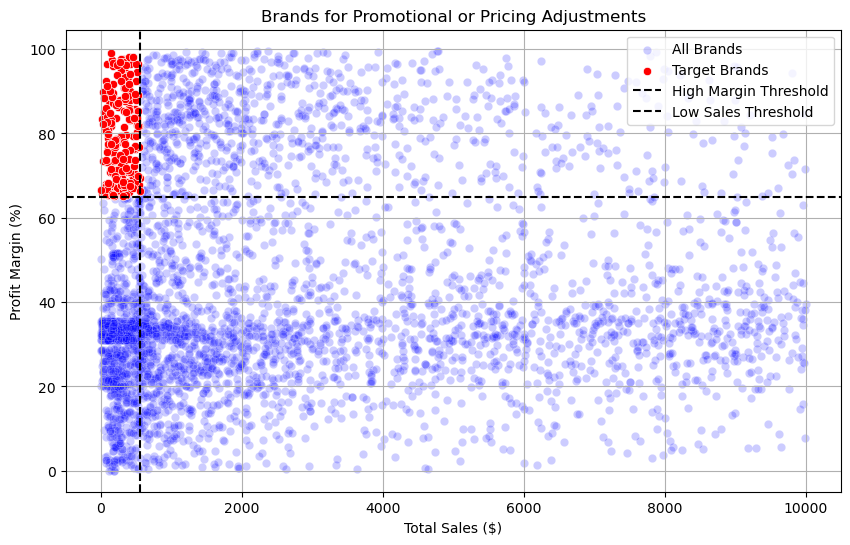

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=brand_perfomance, x='TotalSaleDollars', y='ProfitMargin', color="blue", label="All Brands", alpha = 0.2)
sns.scatterplot(data=target_brands, x='TotalSaleDollars', y='ProfitMargin', color="red", label="Target Brands")

plt.axhline(high_threshold, linestyle='--', color='black', label="High Margin Threshold")

plt.axvline(low_sales_threshold, linestyle='--', color='black', label="Low Sales Threshold")

plt.xlabel("Total Sales ($)")

plt.ylabel("Profit Margin (%)")

plt.title("Brands for Promotional or Pricing Adjustments")

plt.legend()

plt.grid(True)

plt.show()

which vendor and brands demonstrates the highest sales perfomance

In [21]:
top_vendors = df.groupby('VendorName')['TotalSaleDollars'].sum().nlargest(10)
top_brands = df.groupby('Description')['TotalSaleDollars'].sum().nlargest(10)

In [22]:
top_vendors

VendorName
DIAGEO NORTH AMERICA INC     67990099.4200
MARTIGNETTI COMPANIES        39330359.3600
PERNOD RICARD USA            32063196.1900
JIM BEAM BRANDS COMPANY      31423020.4600
BACARDI USA INC              24854817.1400
CONSTELLATION BRANDS INC     24218745.6500
E & J GALLO WINERY           18399899.4600
BROWN-FORMAN CORP            18247230.6500
ULTRA BEVERAGE COMPANY LLP   16502544.3100
M S WALKER INC               14706458.5100
Name: TotalSaleDollars, dtype: float64

In [23]:
top_brands

Description
Jack Daniels No 7 Black   7964746.7600
Tito's Handmade Vodka     7399657.5800
Grey Goose Vodka          7209608.0600
Capt Morgan Spiced Rum    6356320.6200
Absolut 80 Proof          6244752.0300
Jameson Irish Whiskey     5715759.6900
Ketel One Vodka           5070083.5600
Baileys Irish Cream       4150122.0700
Kahlua                    3604858.6600
Tanqueray                 3456697.9000
Name: TotalSaleDollars, dtype: float64

In [24]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.2f}K"
    else:
        return str(value)

In [25]:
top_brands.apply(lambda x: format_dollars(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: TotalSaleDollars, dtype: object

In [26]:
top_vendors.apply(lambda x: format_dollars(x))

VendorName
DIAGEO NORTH AMERICA INC      67.99M
MARTIGNETTI COMPANIES         39.33M
PERNOD RICARD USA             32.06M
JIM BEAM BRANDS COMPANY       31.42M
BACARDI USA INC               24.85M
CONSTELLATION BRANDS INC      24.22M
E & J GALLO WINERY            18.40M
BROWN-FORMAN CORP             18.25M
ULTRA BEVERAGE COMPANY LLP    16.50M
M S WALKER INC                14.71M
Name: TotalSaleDollars, dtype: object

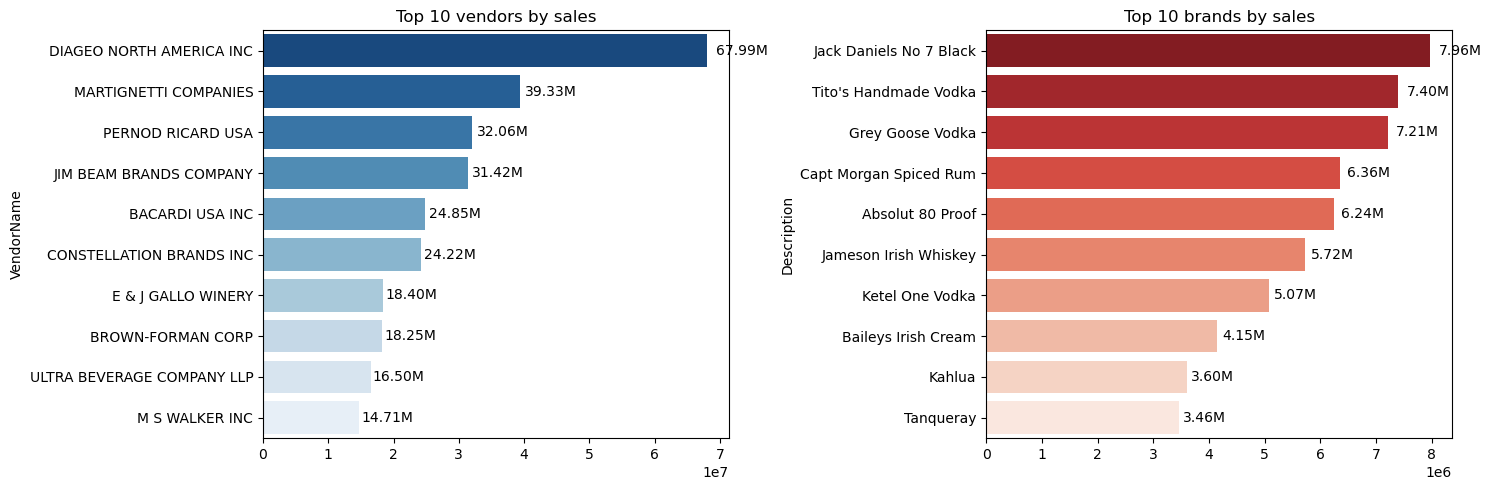

In [27]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="Blues_r")
plt.title("Top 10 vendors by sales")

for bar in ax1.patches:
    ax1.text(bar.get_width()+(bar.get_width() * 0.02),
        bar.get_y() + bar.get_height() / 2, 
        format_dollars(bar.get_width()), 
        ha='left', va='center', fontsize=10, color='black')


plt.subplot(1,2,2)
ax2 = sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette="Reds_r")  # Fixed variable name from ax1 to ax2
plt.title("Top 10 brands by sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width() * 0.02), 
        bar.get_y() + bar.get_height() / 2, 
        format_dollars(bar.get_width()), 
        ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

In [28]:
vendor_perfomance=df.groupby('VendorName').agg({
    'TotalDollars': 'sum',
    'GrossProfit': 'sum',
    'TotalSaleDollars': 'sum'
}).reset_index()
vendor_perfomance.shape

(119, 4)

In [29]:
vendor_perfomance['PercentageContribution%'] = vendor_perfomance['TotalDollars']/vendor_perfomance['TotalDollars'].sum()*100

In [30]:
vendor_perfomance =round(vendor_perfomance.sort_values('PercentageContribution%', ascending = False),2)

In [31]:
top_vendors = vendor_perfomance.head(10)
top_vendors['TotalDollars'] = top_vendors['TotalDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)
top_vendors['TotalSaleDollars'] = top_vendors['TotalSaleDollars'].apply(format_dollars)
top_vendors                                                                    

,VendorName,TotalDollars,GrossProfit,TotalSaleDollars,PercentageContribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.3000
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.3000
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.7600
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.6400
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.6700
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.9700
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.3100
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.9300
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.6300
53,M S WALKER INC,9.76M,4.94M,14.71M,3.1800


In [32]:
top_vendors['PercentageContribution%'].sum()

np.float64(65.69000000000001)

In [33]:
top_vendors['CumulativeContribution%'] = top_vendors['PercentageContribution%'].cumsum()
top_vendors

,VendorName,TotalDollars,GrossProfit,TotalSaleDollars,PercentageContribution%,CumulativeContribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.3000,16.3000
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.3000,24.6000
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.7600,32.3600
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.6400,40.0000
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.6700,45.6700
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.9700,50.6400
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.3100,54.9500
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.9300,58.8800
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.6300,62.5100
53,M S WALKER INC,9.76M,4.94M,14.71M,3.1800,65.6900


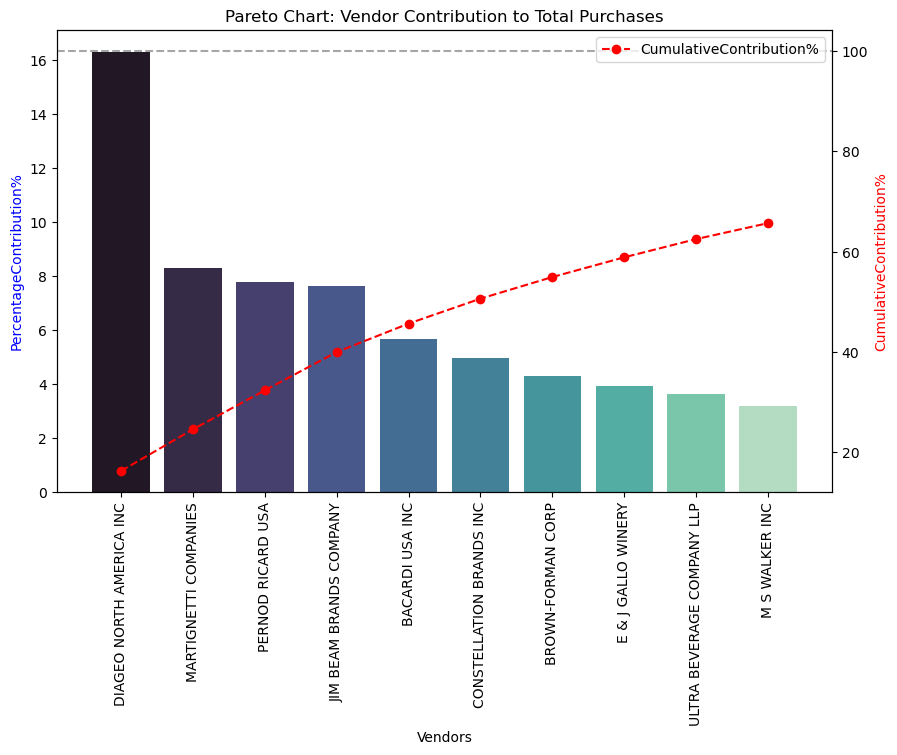

In [34]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Fixed syntax error: Added missing opening bracket before 'VendorName'
sns.barplot(x=top_vendors['VendorName'], y=top_vendors['PercentageContribution%'], palette="mako", ax=ax1)

for i, value in enumerate(top_vendors['PercentageContribution%']):
    # Fixed indentation and added a + between value and 1
    ax1.text(i, value + 1, str(value)+'%', ha='center', fontsize=10, color='white')

# Line Plot for Cumulative Contributions
ax2 = ax1.twinx()

ax2.plot(top_vendors['VendorName'], top_vendors['CumulativeContribution%'], color='red', marker='o', linestyle='dashed', 
label='CumulativeContribution%')

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)

ax1.set_ylabel('PercentageContribution%', color='blue')

ax2.set_ylabel('CumulativeContribution%', color='red')

ax1.set_xlabel('Vendors')

ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7) 
ax2.legend(loc='upper right')

plt.show()

How much of total procurement is dependent on the top vendors?

In [35]:
print(f"Total procurement of top 10 vendors is{round(top_vendors['PercentageContribution%'].sum(),2)}%")

Total procurement of top 10 vendors is65.69%


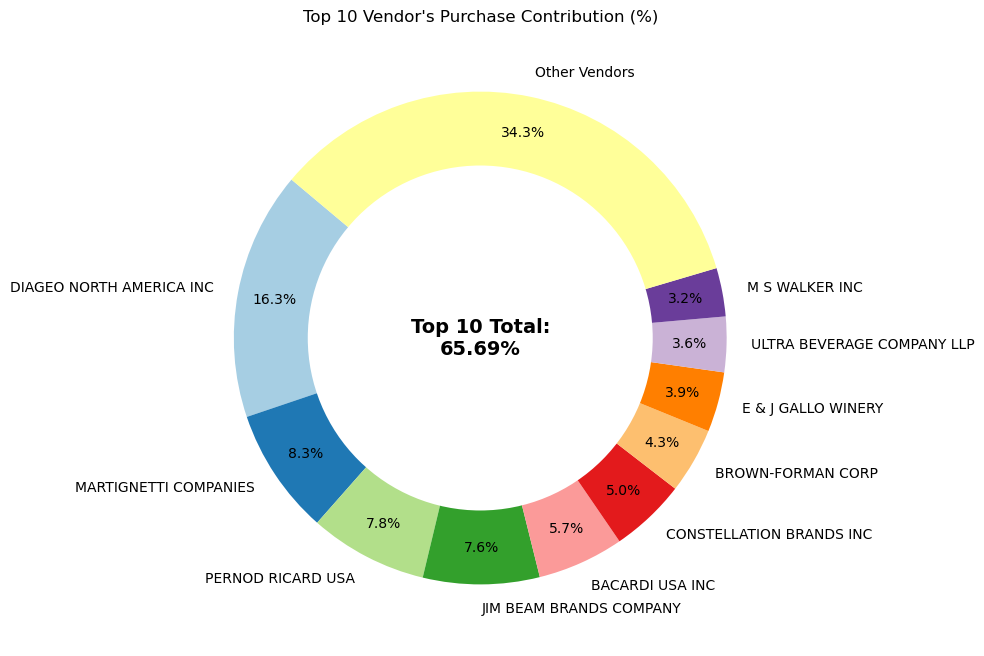

In [36]:
vendors = list(top_vendors['VendorName'].values)

purchase_contributions = list(top_vendors['PercentageContribution%'].values)

total_contribution = sum(purchase_contributions)

remaining_contribution = 100 - total_contribution

# Append "Other Vendors" category
vendors.append("Other Vendors")

purchase_contributions.append(remaining_contribution)

# Donut Chart
fig, ax = plt.subplots(figsize=(8, 8))

wedges, texts, autotexts = ax.pie(purchase_contributions, labels=vendors, autopct='%1.1f%%', startangle=140, pctdistance=0.85, colors=plt.cm.Paired.colors)

# Draw a white circle in the center to create a "donut" effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')

fig.gca().add_artist(centre_circle)

# Add Total Contribution annotation in the center
plt.text(0, 0, f"Top 10 Total:\n{total_contribution:.2f}%", fontsize=14, fontweight='bold', ha='center', va='center')

plt.title("Top 10 Vendor's Purchase Contribution (%)")

plt.show()

Does purchasing in bulk reduce the unit price, and what is the optimal purchase volume for cost savings.

In [37]:
df['UnitPurchasePrice'] = df['TotalDollars']/df['TotalPurchaseQuantity']

In [38]:
df

,VendorNumber,VendorName,Description,Brand,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalDollars,TotalSalesQuantity,TotalSaleDollars,TotalSalePrice,TotalExciseTax,freightcost,GrossProfit,ProfitMargin,StockTurnover,SalesPurchaseRatio,UnitPurchasePrice
0,1128,BROWN-FORMAN CORP,Jack Daniels No 7 Black,1233,26.2700,36.9900,1750.0000,145080,3811251.6000,142049.0000,5101919.5100,672819.3100,260999.2000,68601.6800,1290667.9100,25.2977,0.9791,1.3386,26.2700
1,4425,MARTIGNETTI COMPANIES,Tito's Handmade Vodka,3405,23.1900,28.9900,1750.0000,164038,3804041.2200,160247.0000,4819073.4900,561512.3700,294438.6600,144929.2400,1015032.2700,21.0628,0.9769,1.2668,23.1900
2,17035,PERNOD RICARD USA,Absolut 80 Proof,8068,18.2400,24.9900,1750.0000,187407,3418303.6800,187140.0000,4538120.6000,461140.1500,343854.0700,123780.2200,1119816.9200,24.6758,0.9986,1.3276,18.2400
3,3960,DIAGEO NORTH AMERICA INC,Capt Morgan Spiced Rum,4261,16.1700,22.9900,1750.0000,201682,3261197.9400,200412.0000,4475972.8800,420050.0100,368242.8000,257032.0700,1214774.9400,27.1399,0.9937,1.3725,16.1700
4,3960,DIAGEO NORTH AMERICA INC,Ketel One Vodka,3545,21.8900,29.9900,1750.0000,138109,3023206.0100,135838.0000,4223107.6200,545778.2800,249587.8300,257032.0700,1199901.6100,28.4128,0.9836,1.3969,21.8900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,Concannon Glen Ellen Wh Zin,8527,1.3200,4.9900,750.0000,2,2.6400,5.0000,15.9500,10.9600,0.5500,27100.4100,13.3100,83.4483,2.5000,6.0417,1.3200
8560,8004,SAZERAC CO INC,Dr McGillicuddy's Apple Pie,5683,0.3900,0.4900,50.0000,6,2.3400,134.0000,65.6600,1.4700,7.0400,50293.6200,63.3200,96.4362,22.3333,28.0598,0.3900
8561,3924,HEAVEN HILL DISTILLERIES,Deep Eddy Vodka,9123,0.7400,0.9900,50.0000,2,1.4800,2.0000,1.9800,0.9900,0.1000,14069.8700,0.5000,25.2525,1.0000,1.3378,0.7400
8562,3960,DIAGEO NORTH AMERICA INC,The Club Strawbry Margarita,6127,1.4700,1.9900,200.0000,1,1.4700,72.0000,143.2800,77.6100,15.1200,257032.0700,141.8100,98.9740,72.0000,97.4694,1.4700


In [39]:
df["OrderSize"] = pd.qcut(df["TotalPurchaseQuantity"], q=3, labels=["Small", "Medium", "Large"])

In [40]:
df[['OrderSize', 'TotalPurchaseQuantity']]

,OrderSize,TotalPurchaseQuantity
0,Large,145080
1,Large,164038
2,Large,187407
3,Large,201682
4,Large,138109
...,...,...
8559,Small,2
8560,Small,6
8561,Small,2
8562,Small,1


In [41]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,39.0682
Medium,15.4864
Large,10.7776


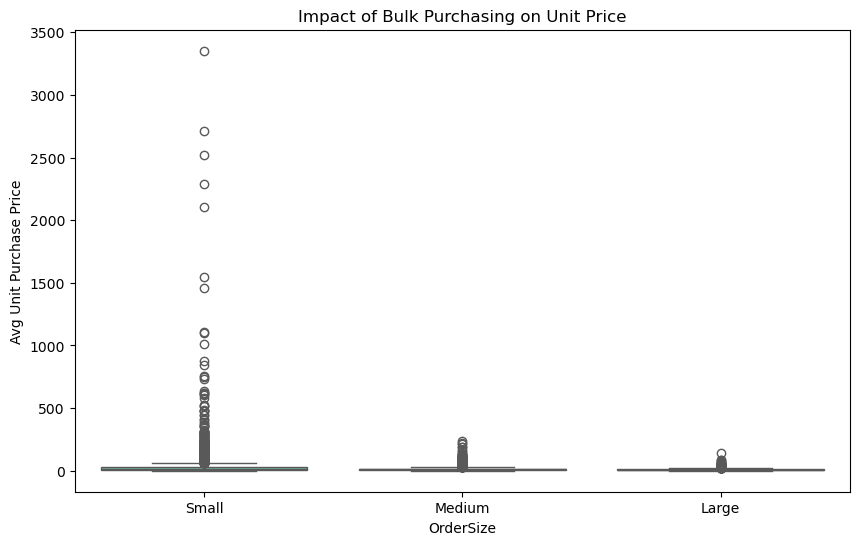

In [42]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="OrderSize", y="UnitPurchasePrice", palette="Set2")
plt.title("Impact of Bulk Purchasing on Unit Price")
plt.xlabel("OrderSize")
plt.ylabel("Avg Unit Purchase Price")
plt.show()

Vendors buying in bulk (Large Order Size) get the lowest unit price ($10.78 per unit), meaning higher margins if they can manage inventory efficiently.

The price difference between Small and Large orders is substantial (~72% reduction in unit cost)

This suggests that bulk pricing strategies successfully encourage vendors to purchase in larger volumes, leading to higher overall sales despite lower per-unit revenue.

Which Vendor have low inventory turnover, indicating excess stock and slow moving products?

In [43]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover', ascending = True).head(10)

,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.6154
HIGHLAND WINE MERCHANTS LLC,0.7083
PARK STREET IMPORTS LLC,0.7513
Circa Wines,0.7557
Dunn Wine Brokers,0.7660
CENTEUR IMPORTS LLC,0.7740
SMOKY QUARTZ DISTILLERY LLC,0.7838
TAMWORTH DISTILLING,0.7971
THE IMPORTED GRAPE LLC,0.8076


How much capital is locked in unsold inventory per vendor and which vendors contribute the most to it?

In [44]:
df["UnsoldInventoryValue"]= (df["TotalPurchaseQuantity"]- df["TotalSalesQuantity"])*df["PurchasePrice"]
print('Total Unsold Inventory is: ', format_dollars(df["UnsoldInventoryValue"].sum()))

Total Unsold Inventory is:  2.71M


In [45]:
inventory_value_per_vendor = df.groupby("VendorName")[["UnsoldInventoryValue"]].sum().reset_index()
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue", ascending= False)
inventory_value_per_vendor["UnsoldInventoryValue"]= inventory_value_per_vendor["UnsoldInventoryValue"].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,722.21K
46,JIM BEAM BRANDS COMPANY,554.67K
68,PERNOD RICARD USA,470.63K
116,WILLIAM GRANT & SONS INC,401.96K
30,E & J GALLO WINERY,228.28K
79,SAZERAC CO INC,198.44K
11,BROWN-FORMAN CORP,177.73K
20,CONSTELLATION BRANDS INC,133.62K
61,MOET HENNESSY USA INC,126.48K
77,REMY COINTREAU USA INC,118.60K


In [46]:
top_threshold = df["TotalSaleDollars"].quantile(0.75)
low_threshold = df["TotalSaleDollars"].quantile(0.25)

In [47]:
top_vendors = df[df["TotalSaleDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSaleDollars"] <= low_threshold]["ProfitMargin"].dropna()

In [48]:
top_vendors

0      25.2977
1      21.0628
2      24.6758
3      27.1399
4      28.4128
         ...  
3523   79.6848
3681   85.7821
4751   93.0859
4920   95.0125
5050   94.2719
Name: ProfitMargin, Length: 2141, dtype: float64

In [49]:
low_vendors

5631    4.1118
5652    6.1456
5701   12.0073
5704    1.6773
5724    7.2396
         ...  
8559   83.4483
8560   96.4362
8561   25.2525
8562   98.9740
8563   99.1661
Name: ProfitMargin, Length: 2141, dtype: float64

In [50]:
def confidence_interval(data, confidence=0.95):
    # Fixed syntax by adding proper equals signs and removing non-printable characters
    
    mean_val = np.mean(data)
    
    # Added equals sign here
    std_err = np.std(data, ddof=1)/np.sqrt(len(data))
    
    # Fixed equals sign and added parentheses
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)
    
    # Added equals sign
    margin_of_error = t_critical * std_err
    
    # Added multiplication operator
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error

Top Vendors 95% CI: (top_lower: 30.742063812031255, top_upper: 31.613761054113375), Mean: 31.177912433072315
Low Vendors 95% CI: (low_lower: 40.50141289982574, low_upper: 42.6369267261271), Mean: 41.56916981297642


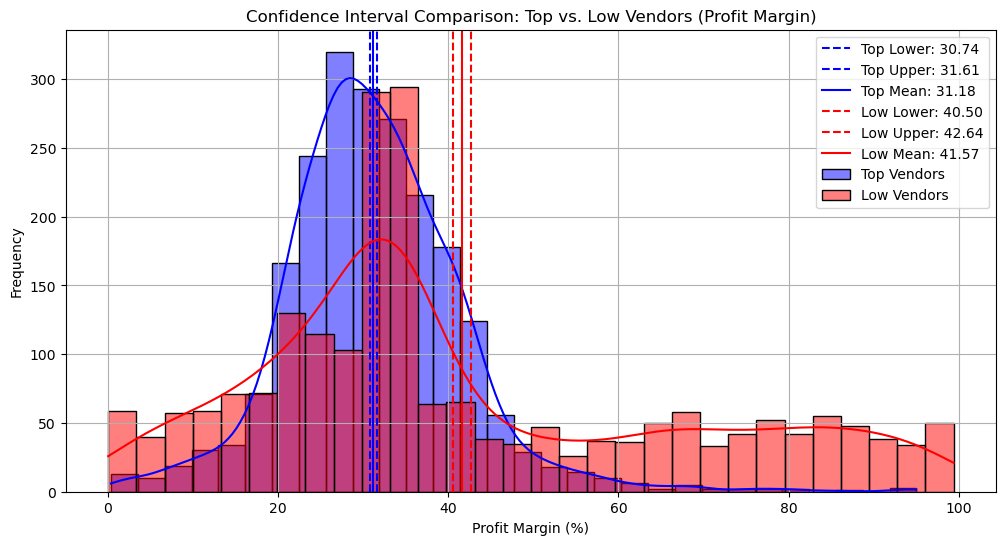

In [51]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)


# Print confidence intervals
print(f"Top Vendors 95% CI: (top_lower: {top_lower}, top_upper: {top_upper}), Mean: {top_mean}")
print(f"Low Vendors 95% CI: (low_lower: {low_lower}, low_upper: {low_upper}), Mean: {low_mean}")

# Create figure
plt.figure(figsize=(12, 6))

# Top Vendors Plot
sns.histplot(top_vendors, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle="-", label=f"Top Mean: {top_mean:.2f}")

# Low Vendors Plot
sns.histplot(low_vendors, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="-", label=f"Low Mean: {low_mean:.2f}")

# Finalize Plot
plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

The confidence interval for low-performing vendors (40.48% to 42.62%) is significantly higher than that of top-performing vendors (30.74% to 31.61%).

This suggests that vendors with lower sales tend to maintain higher profit margins, potentially due to premium pricing or lower operational costs.

For High-Performing Vendors: If they aim to improve profitability, they could explore selective price adjustments, cost optimization, or bundling strategies.

For Low-Performing Vendors: Despite higher margins, their low sales volume might indicate a need for better marketing, competitive pricing, or improved distribution strategies.

Is there a significant difference in profit margins between top-performing and low-performing vendors?

Hypothesis:

H0 (Null Hypothesis): There is no significant difference in the mean profit margins of top-performing and low-performing vendors.

H1 (Alternative Hypothesis): The mean profit margins of top-performing and low-performing vendors are significantly different.

In [52]:
# Fix the syntax errors in the code
top_threshold = df["TotalSaleDollars"].quantile(0.75)
low_threshold = df["TotalSaleDollars"].quantile(0.25)

# Fixed the bracket placement and spacing
top_vendors = df[df["TotalSaleDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSaleDollars"] <= low_threshold]["ProfitMargin"].dropna()

# Perform Two-Sample T-Test
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)

# Print results - fixed the f-string formatting
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")

if p_value < 0.05:
    # Fixed indentation
    print("Reject Ho: There is a significant difference in profit margins between top and low-performing vendors.")
else:
    # Fixed indentation
    print("Fail to Reject Ho: No significant difference in profit margins.")

T-Statistic: -17.6695, P-Value: 0.0000
Reject Ho: There is a significant difference in profit margins between top and low-performing vendors.


In [53]:
df

,VendorNumber,VendorName,Description,Brand,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalDollars,TotalSalesQuantity,...,TotalSalePrice,TotalExciseTax,freightcost,GrossProfit,ProfitMargin,StockTurnover,SalesPurchaseRatio,UnitPurchasePrice,OrderSize,UnsoldInventoryValue
0,1128,BROWN-FORMAN CORP,Jack Daniels No 7 Black,1233,26.2700,36.9900,1750.0000,145080,3811251.6000,142049.0000,...,672819.3100,260999.2000,68601.6800,1290667.9100,25.2977,0.9791,1.3386,26.2700,Large,79624.3700
1,4425,MARTIGNETTI COMPANIES,Tito's Handmade Vodka,3405,23.1900,28.9900,1750.0000,164038,3804041.2200,160247.0000,...,561512.3700,294438.6600,144929.2400,1015032.2700,21.0628,0.9769,1.2668,23.1900,Large,87913.2900
2,17035,PERNOD RICARD USA,Absolut 80 Proof,8068,18.2400,24.9900,1750.0000,187407,3418303.6800,187140.0000,...,461140.1500,343854.0700,123780.2200,1119816.9200,24.6758,0.9986,1.3276,18.2400,Large,4870.0800
3,3960,DIAGEO NORTH AMERICA INC,Capt Morgan Spiced Rum,4261,16.1700,22.9900,1750.0000,201682,3261197.9400,200412.0000,...,420050.0100,368242.8000,257032.0700,1214774.9400,27.1399,0.9937,1.3725,16.1700,Large,20535.9000
4,3960,DIAGEO NORTH AMERICA INC,Ketel One Vodka,3545,21.8900,29.9900,1750.0000,138109,3023206.0100,135838.0000,...,545778.2800,249587.8300,257032.0700,1199901.6100,28.4128,0.9836,1.3969,21.8900,Large,49712.1900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,Concannon Glen Ellen Wh Zin,8527,1.3200,4.9900,750.0000,2,2.6400,5.0000,...,10.9600,0.5500,27100.4100,13.3100,83.4483,2.5000,6.0417,1.3200,Small,-3.9600
8560,8004,SAZERAC CO INC,Dr McGillicuddy's Apple Pie,5683,0.3900,0.4900,50.0000,6,2.3400,134.0000,...,1.4700,7.0400,50293.6200,63.3200,96.4362,22.3333,28.0598,0.3900,Small,-49.9200
8561,3924,HEAVEN HILL DISTILLERIES,Deep Eddy Vodka,9123,0.7400,0.9900,50.0000,2,1.4800,2.0000,...,0.9900,0.1000,14069.8700,0.5000,25.2525,1.0000,1.3378,0.7400,Small,0.0000
8562,3960,DIAGEO NORTH AMERICA INC,The Club Strawbry Margarita,6127,1.4700,1.9900,200.0000,1,1.4700,72.0000,...,77.6100,15.1200,257032.0700,141.8100,98.9740,72.0000,97.4694,1.4700,Small,-104.3700


In [57]:
df.to_csv(r'C:\Users\LAPTOP\Desktop\coding\output\vendor_perfomance.csv')

In [73]:
vendor_perfomance

,VendorName,TotalDollars,PercentageContribution%
25,DIAGEO NORTH AMERICA INC,50097226.1600,16.3000
57,MARTIGNETTI COMPANIES,25502095.8300,8.3000
68,PERNOD RICARD USA,23851164.1700,7.7600
46,JIM BEAM BRANDS COMPANY,23494304.3200,7.6400
6,BACARDI USA INC,17432020.2600,5.6700
...,...,...,...
33,FANTASY FINE WINES CORP,128.6400,0.0000
107,UNCORKED,118.7400,0.0000
85,SILVER MOUNTAIN CIDERS,77.1800,0.0000
16,CAPSTONE INTERNATIONAL,54.6400,0.0000


In [58]:
brand_perfomance

,Description,TotalSaleDollars,ProfitMargin
1,.nparalleled Svgn Blanc,1094.6300,29.9782
2,10 Span Cab Svgn CC,2703.8900,20.9376
3,10 Span Chard CC,3325.5600,27.8064
4,10 Span Pnt Gris Monterey Cy,2082.2200,32.2262
5,10 Span Pnt Nr CC,2441.7400,25.8361
...,...,...,...
7695,Zonin Prosecco Brut,4382.2800,31.2906
7696,Zorah Red,417.8100,67.5594
7703,Zuccardi Q Malbec,1639.1800,23.9815
7705,Zwack Liqueur,227.8800,16.6535


In [72]:
vendor_perfomance.to_csv(r'C:\Users\LAPTOP\Desktop\coding\output\percentagecontribution%.csv')